# Boston House Prices Regression

# Import Libraries

In [45]:
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, LeakyReLU
from matplotlib import pylab as plt
%matplotlib inline

# Data Exploration

In [3]:
df = pd.read_csv('./datasets/home_data.csv')
df.shape

(21613, 21)

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [8]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="output.html")
display(profile)

Number of variables,21
Number of observations,21613
Total Missing (%),0.0%
Total size in memory,3.5 MiB
Average record size in memory,168.0 B
Numeric,19
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [11]:
corr_mat = df.corr()
# Filter by price column and sort descending
corr_mat['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

# Data Cleaning & Preparation

In [80]:
# building our labels and features
labels = df[['price']]
# we drop some features which we think are not useful for our problem here!
features = df.drop(['id', 'date', 'price', 'lat', 'long', 'sqft_lot15'], axis=1)
print('features.shape: {}, labels.shape: {}'.format(features.shape, labels.shape))

features.shape: (21613, 15), labels.shape: (21613, 1)


In [81]:
x_train, x_test, y_train, y_test = train_test_split(features.values, labels.values, test_size=0.1, random_state=42)

scaler = StandardScaler()
# make sure we fit and transform the training dataset
x_train = scaler.fit_transform(x_train)
# make sure we only transform the test dataset
x_test = scaler.transform(x_test)

print('Train Size, x: {}, y: {}'.format(x_train.shape, y_train.shape))
print('Test Size, x: {}, y: {}'.format(x_test.shape, y_test.shape))

Train Size, x: (19451, 15), y: (19451, 1)
Test Size, x: (2162, 15), y: (2162, 1)


# Modelization

In [106]:
model = Sequential()
model.add(Dense(50, input_dim=x_train.shape[1], kernel_initializer="normal", activation='relu'))
# model.add(Dense(20, kernel_initializer="normal", activation='relu'))
model.add(Dense(20, kernel_initializer="normal"))
# model.add(Dense(10, kernel_initializer="normal", activation='relu'))
# model.add(Dense(8, kernel_initializer="normal", activation='relu'))
# model.add(Dense(5))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 50)                800       
_________________________________________________________________
dense_71 (Dense)             (None, 20)                1020      
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 21        
Total params: 1,841
Trainable params: 1,841
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Set learning rate
lr = 0.3

# Set optimiser
opt = optimizers.Adam(lr=lr)

# Compile model
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

# Set to variable if you want to store training statistics
history = model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
19451/19451 [==============================] - 4s 183us/step - loss: 58927305896.9381 - mean_absolute_error: 155791.3745
Epoch 2/20
19451/19451 [==============================] - 2s 118us/step - loss: 41892510649.0870 - mean_absolute_error: 135396.9163
Epoch 3/20
19451/19451 [==============================] - 2s 121us/step - loss: 41262879649.1335 - mean_absolute_error: 134203.2163
Epoch 4/20
19451/19451 [==============================] - 9s 474us/step - loss: 39393323267.2245 - mean_absolute_error: 130999.5082
Epoch 5/20
19451/19451 [==============================] - 6s 314us/step - loss: 37522307388.6077 - mean_absolute_error: 129136.3010
Epoch 6/20
19451/19451 [==============================] - 5s 245us/step - loss: 37457398733.0395 - mean_absolute_error: 128619.7414
Epoch 7/20
19451/19451 [==============================] - 4s 212us/step - loss: 35865094849.1286 - mean_absolute_error: 125969.2393
Epoch 8/20
19451/19451 [==============================] - 4s 185us/step - lo

dict_keys(['loss', 'mean_absolute_error'])


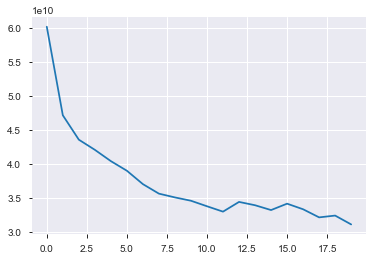

In [104]:
# let's print our loss function
print(history.history.keys())

plt.figure()
plt.plot(history.history['loss'])
plt.show()

In [105]:
# let's check our model's performance
predictions = model.predict(x_test)
mae = mean_absolute_error(y_test, predictions)

print("Total error: $%.2f" %mae)

Total error: $123547.26


In [35]:
# let's compare not a standard linear regression
regr = LinearRegression()
regr.fit(x_train, y_train)
error = []

l_predictions = regr.predict(x_test)

l_mae = mean_absolute_error(y_test, l_predictions)

print("Total error: $%.2f" %l_mae)

Total error: $158066.70
